# 領域処理

In [1]:
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/sample.jpg
!pip install japanize-matplotlib

--2021-07-02 08:45:24--  https://github.com/eiichiromomma/CVMLAB/raw/master/img/sample.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/sample.jpg [following]
--2021-07-02 08:45:24--  https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/sample.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78522 (77K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  76.68K  --.-KB/s    in 0.01s   

2021-07-02 08:45:24 (6.19 MB/s) - ‘sample.jpg’ saved [78522/78522]

     |████████████████████████████████| 4.1MB 6.7MB/s 
  Cr

# インタラクティブなGabor filterのデモ

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops # 0.18.xまでは"grey"
import japanize_matplotlib
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rc('figure', figsize=[24,12])
gimg = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)


```Python
kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi)
```
* ksize カーネルサイズ
* sigma ガウシアン分布の標準偏差
* theta	しましまの角度
* lambd	波長の目安
* gamma 空間的なアスペクト非
* psi 位相


In [3]:
kernel_size =21
sigma = 5
lm = kernel_size-2
th = 0
gam = 1.0
psi = 90
def f(sigma, lm, th, gam, psi):
    lm = lm+2
    th = np.deg2rad(th)
    psi = np.deg2rad(psi-180)
    print ('kern_size=' + str(kernel_size) + ', sigma=' + str(sigma) + ', th=' + str(th) + ', lm=' + str(lm) +', gam=' + str(gam) + ', ps=' + str(psi))
    kernel = cv2.getGaborKernel((kernel_size,kernel_size),sigma,th,lm,gam,psi)
    kernelimg = kernel/2.+0.5
    global gimg
    dest = cv2.filter2D(gimg, cv2.CV_32F,kernel)
    plt.subplot(1,3,1)
    plt.imshow(kernelimg, cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(dest, cmap='gray')
    return sigma

## ウイジェットを定義して，コールバック関数として上のfを呼び出す

In [4]:
w=interactive(f, sigma=widgets.IntSlider(min=3, max=kernel_size//2, value=sigma),
              lm=widgets.IntSlider(min=1, max=kernel_size-2, value=lm),
              th=widgets.IntSlider(max=360, value=th),
              gam=widgets.FloatSlider(min = 0.0, max=3.0, step=0.1, value=gam),
              psi=widgets.IntSlider(max=360, value=psi))

In [5]:
display(w)


interactive(children=(IntSlider(value=5, description='sigma', max=10, min=3), IntSlider(value=19, description=…

# GLCM

見辛いが左の建物と空と通行人の3種についてGLCMを求める

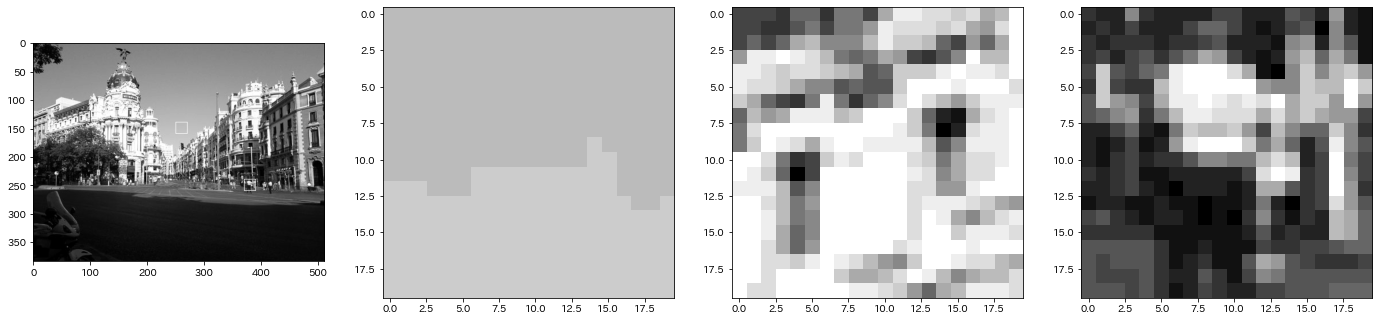

In [6]:

gimg = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
tmpgimg = gimg.copy()
patch_sky = gimg[140:160, 250:270].copy()
patch_arch = gimg[120:140, 80:100].copy()
patch_pe = gimg[240:260, 370:390].copy()
patch_sky = patch_sky//16
patch_arch = patch_arch//16
patch_pe = patch_pe//16
cv2.rectangle(tmpgimg, (250,140), (270, 160), 255, 1)
cv2.rectangle(tmpgimg, (80,120), (100, 140), 0, 1)
dst = cv2.rectangle(tmpgimg, (370, 240), (390, 260), 255, 1)
plt.subplot(1,4,1)
plt.imshow(dst, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(patch_sky, cmap='gray', vmin=0, vmax=15)
plt.subplot(1,4,3)
plt.imshow(patch_arch, cmap='gray', vmin=0, vmax=15)
plt.subplot(1,4,4)
plt.imshow(patch_pe, cmap='gray', vmin=0, vmax=15)

## パッチのGLCM
注目画素と，移動先のそれぞれの濃度値の関係が縦軸横軸で，その頻度分布となためGLCMは3次元の曲面となる

Sky(contrast)=  [[0.02894737]]
Arch(contrast)=  [[7.11315789]]
Pedestrian(contrast)=  [[10.66842105]]
Sky(dissimilarity)=  [[0.02894737]]
Arch(dissimilarity)=  [[1.80263158]]
Pedestrian(dissimilarity)=  [[2.2]]
Sky(homogeneity)=  [[0.98552632]]
Arch(homogeneity)=  [[0.48630571]]
Pedestrian(homogeneity)=  [[0.43958738]]
Sky(ASM)=  [[0.48743767]]
Arch(ASM)=  [[0.0481856]]
Pedestrian(ASM)=  [[0.01869806]]
Sky(energy)=  [[0.69816737]]
Arch(energy)=  [[0.21951218]]
Pedestrian(energy)=  [[0.13674085]]
Sky(correlation)=  [[0.94026203]]
Arch(correlation)=  [[0.73418516]]
Pedestrian(correlation)=  [[0.70631574]]


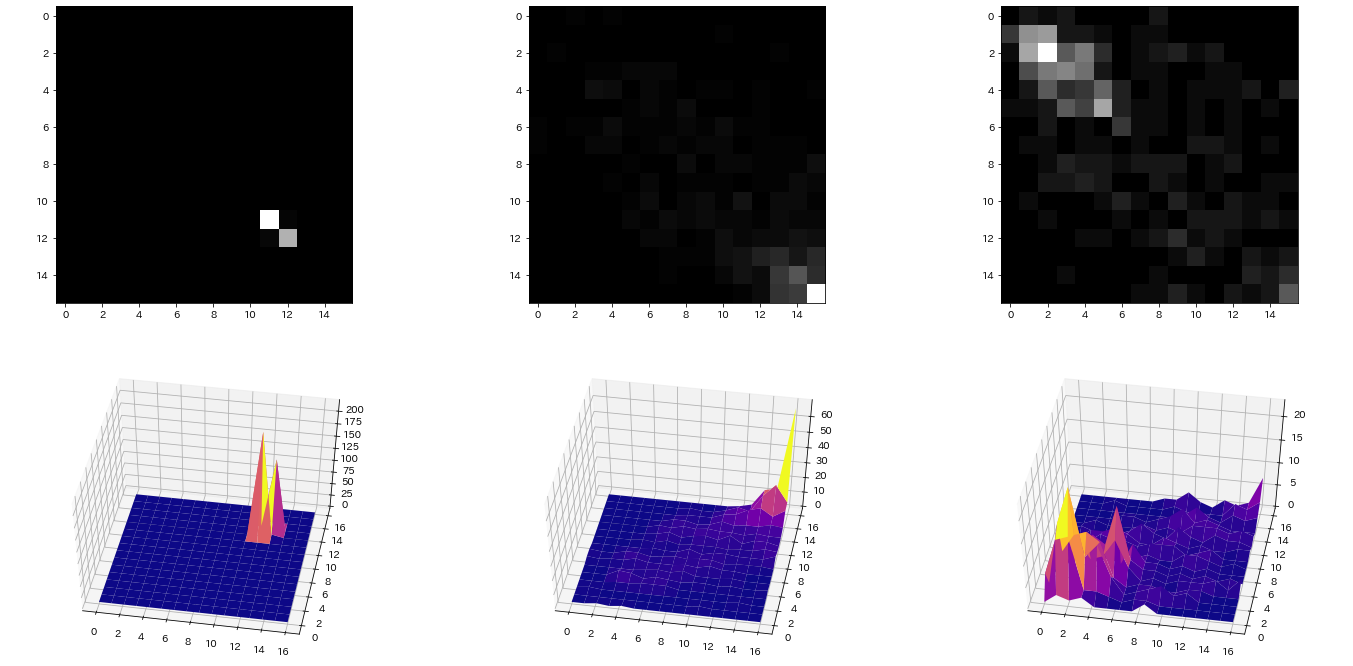

In [7]:

glcm_sky = greycomatrix(patch_sky, distances=[1], angles=[0], levels=16)
glcm_arch = greycomatrix(patch_arch, distances=[1], angles=[0], levels=16)
glcm_pe = greycomatrix(patch_pe, distances=[1], angles=[0], levels=16)
plt.subplot(2,3,1)
plt.imshow(glcm_sky[:,:, 0, 0], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(glcm_arch[:, :, 0, 0], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(glcm_pe[:, :, 0, 0], cmap='gray')
ax3d = plt.subplot(2,3,4, projection = '3d')
x = np.linspace(0, glcm_sky.shape[1], num=glcm_sky.shape[1])
y = np.linspace(0, glcm_sky.shape[0], num=glcm_sky.shape[0])
X, Y = np.meshgrid(x,y)
ax3d.view_init(elev=50, azim=-80)
ax3d.plot_surface(X, Y, glcm_sky[:,:, 0, 0], cmap='plasma')
ax3d = plt.subplot(2,3,5, projection = '3d')
x = np.linspace(0, glcm_arch.shape[1], num=glcm_arch.shape[1])
y = np.linspace(0, glcm_arch.shape[0], num=glcm_arch.shape[0])
X, Y = np.meshgrid(x,y)
ax3d.view_init(elev=50, azim=-80)
ax3d.plot_surface(X, Y, glcm_arch[:,:, 0, 0], cmap='plasma')
ax3d = plt.subplot(2,3,6, projection = '3d')
x = np.linspace(0, glcm_pe.shape[1], num=glcm_pe.shape[1])
y = np.linspace(0, glcm_pe.shape[0], num=glcm_pe.shape[0])
X, Y = np.meshgrid(x,y)
ax3d.view_init(elev=50, azim=-80)
ax3d.plot_surface(X, Y, glcm_pe[:,:, 0, 0], cmap='plasma')
props = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
for p in props:
  print(f'Sky({p})= ', greycoprops(glcm_sky, p))
  print(f'Arch({p})= ', greycoprops(glcm_arch, p))
  print(f'Pedestrian({p})= ', greycoprops(glcm_pe, p))

## 画像についてパッチごとにGLCMから特徴量を求める
特徴量画像で濃淡が同じ=GLCMによる特徴量が同じ領域

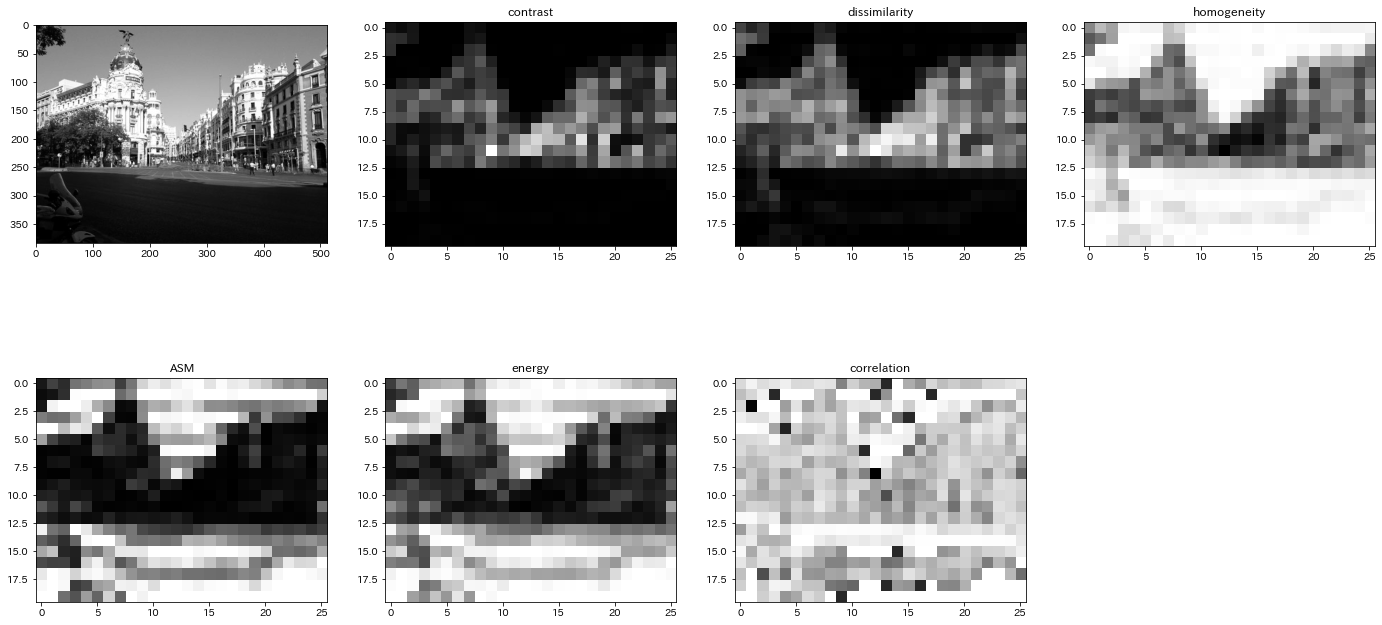

In [8]:
from skimage.measure import block_reduce
step = 20
plt.subplot(2,4,1)
plt.imshow(gimg, cmap='gray')
for index, p in enumerate(props):
  dst = np.zeros((gimg.shape[0]//step+1, gimg.shape[1]//step+1))
  for y in range(0, gimg.shape[0], step):
    for x in range(0, gimg.shape[1], step):
      tmpimg = gimg[y:y+step, x:x+step]//16
      glcm = greycomatrix(tmpimg, distances=[1], angles=[0], levels = 16)
      dst[y//step, x//step] = greycoprops(glcm, p)
  plt.subplot(2,4,2+index)
  plt.imshow(dst, cmap='gray')
  plt.title(p);

# MeanShiftによる領域分割
OpenCVでのMeanShiftを使った領域分割はspの範囲内で色の差がsr以内であれば同一領域として繰り返し探索を行う処理。BGRをそのまま使うのはあまり効率が良くない

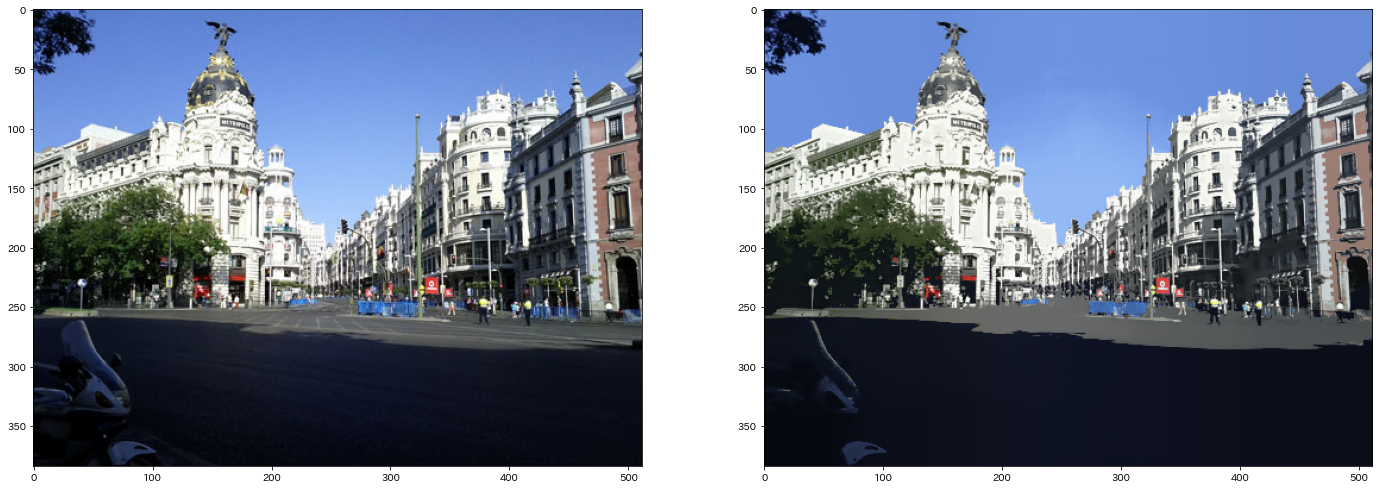

In [9]:
cimg = cv2.imread('sample.jpg')
cdst = cv2.pyrMeanShiftFiltering(cimg, sp=50, sr=30)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(cdst, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)

## HSV色空間でのMeanShiftクラスタリング


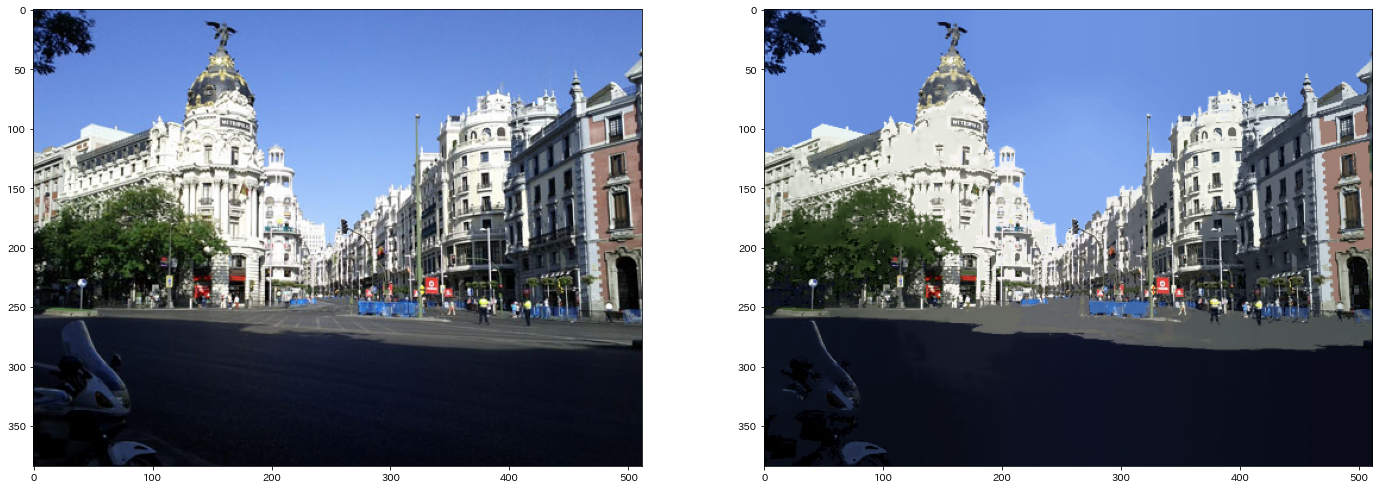

In [10]:
cimg = cv2.imread('sample.jpg')
hsvimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2HSV)
cdst = cv2.pyrMeanShiftFiltering(hsvimg, sp=50, sr=30)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(cdst, cv2.COLOR_HSV2RGB), vmin=0, vmax=255)

# k-meansによるクラスタリング
RGBそれぞれを1次元化したうえでcv2.kmeansを使っている。(空間の繋りは無視)



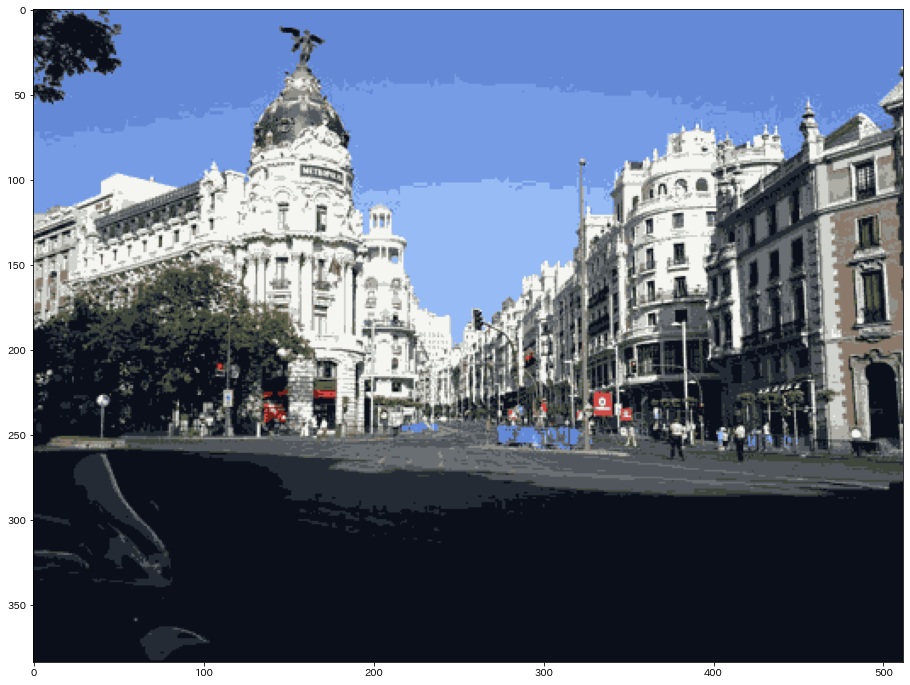

In [11]:
cimg = cv2.imread('sample.jpg')
flt = cimg.reshape((-1, 3)).astype(np.float32) # 各チャネルを1次元に
K = 16 # クラスタ数
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #打ち切り条件は回数と精度
_, label, center = cv2.kmeans(flt, K, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)
center = center.astype(np.uint8) # 色空間の中心座標をuint8に(空間座標も使うならuint16にしておく)
dst1d = center[label.flatten()]  # labelが各画素のラベルなのでこれを色空間の座標に置き換える
dst2d = dst1d.reshape(cimg.shape) # 原画像と同じ形に直す
plt.imshow(cv2.cvtColor(dst2d, cv2.COLOR_BGR2RGB))

# Active Contour(Snakes)による領域抽出
OpenCVからは無くなったのでScikit-Imageを利用する。
0.17までは'xy', 0.18以降は'rc'とややこしい。
サンプルは
https://scikit-image.org/docs/dev/auto_examples/edges/plot_active_contours.html
を一部変更

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


(0.0, 512.0, 512.0, 0.0)

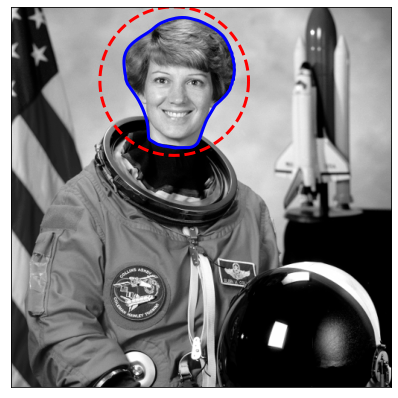

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
y = 100 + 100*np.sin(s)
x = 220 + 100*np.cos(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])


# GrabCut
OpenCVでは[Tutorialに実装](https://docs.opencv.org/4.5.2/d8/d83/tutorial_py_grabcut.html)がある


# SLIC
OpenCVでは実験的モジュールのximgprocに含まれている

Number of Superpixels: 494
Number of Superpixels: 485
Number of Superpixels: 1312


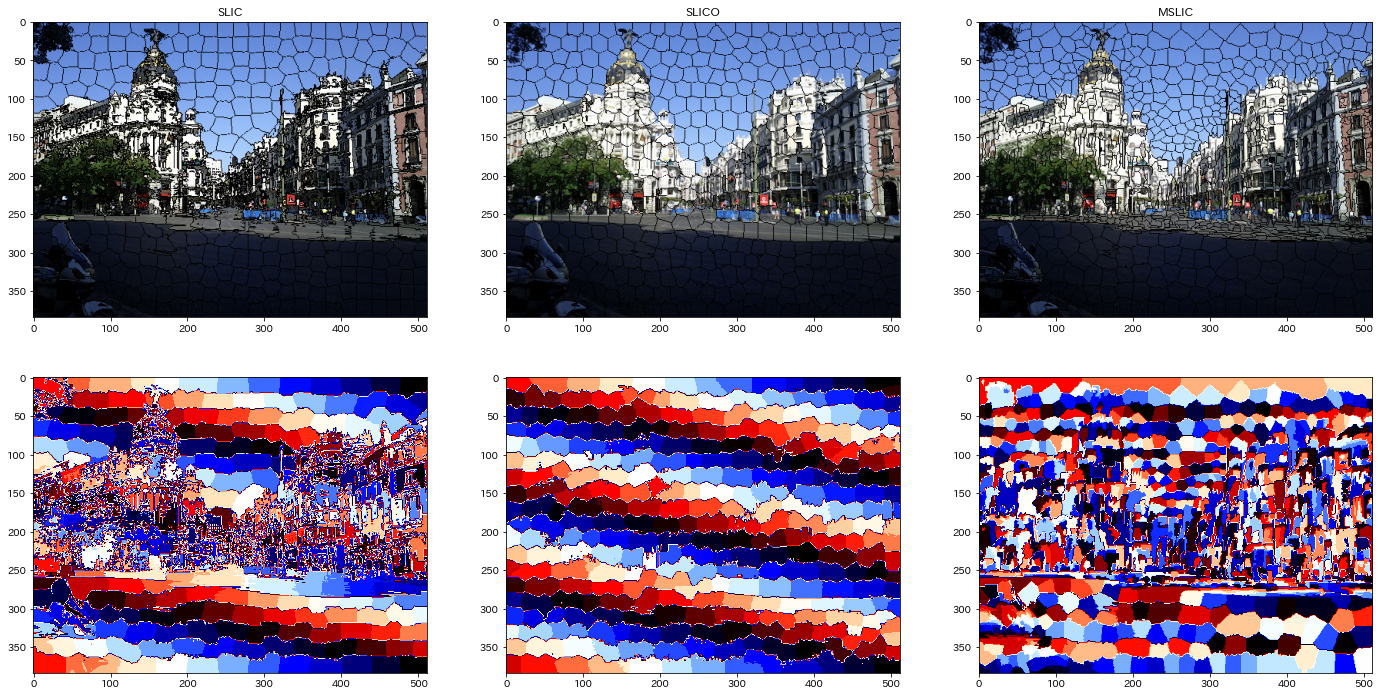

In [13]:
cimg = cv2.imread('sample.jpg')
method = [cv2.ximgproc.SLIC, cv2.ximgproc.SLICO, cv2.ximgproc.MSLIC]
mname = ['SLIC', 'SLICO', 'MSLIC']
for i, m in enumerate(method):
  slic = cv2.ximgproc.createSuperpixelSLIC(cimg, algorithm=m, region_size=20, ruler=20.0)
  slic.iterate(10)
  mask = slic.getLabelContourMask()
  label = slic.getLabels()
  number = slic.getNumberOfSuperpixels()
  inv_mask = cv2.bitwise_not(mask)
  dst = cv2.bitwise_and(cimg, cimg, mask = inv_mask)
  print(f'Number of Superpixels: {number}')
  plt.subplot(2,3,i+1)
  plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  plt.title(f'{mname[i]}')
  plt.subplot(2,3,i+4)
  plt.imshow(label, cmap='flag')

Number of Superpixels: 768


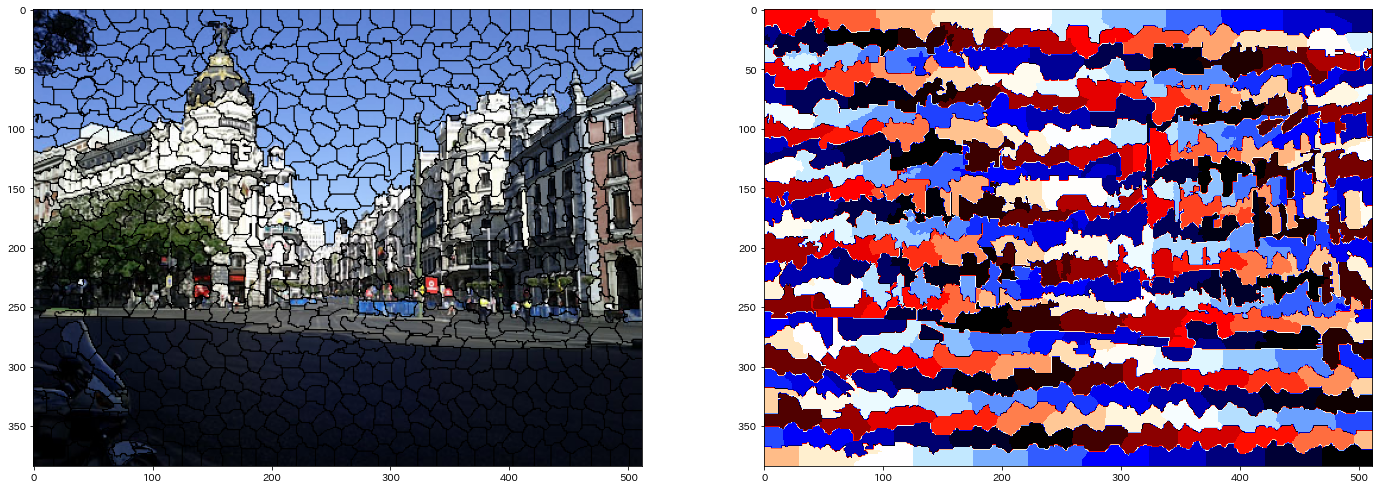

In [14]:
seeds = cv2.ximgproc.createSuperpixelSEEDS(cimg.shape[1], cimg.shape[0], cimg.shape[2], 1000, 15)
seeds.iterate(cimg, 10)
mask = seeds.getLabelContourMask()
label = seeds.getLabels()
number = seeds.getNumberOfSuperpixels()
inv_mask = cv2.bitwise_not(mask)
dst = cv2.bitwise_and(cimg, cimg, mask = inv_mask)
print(f'Number of Superpixels: {number}')
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(label, cmap='flag')

Number of Superpixels: 1938


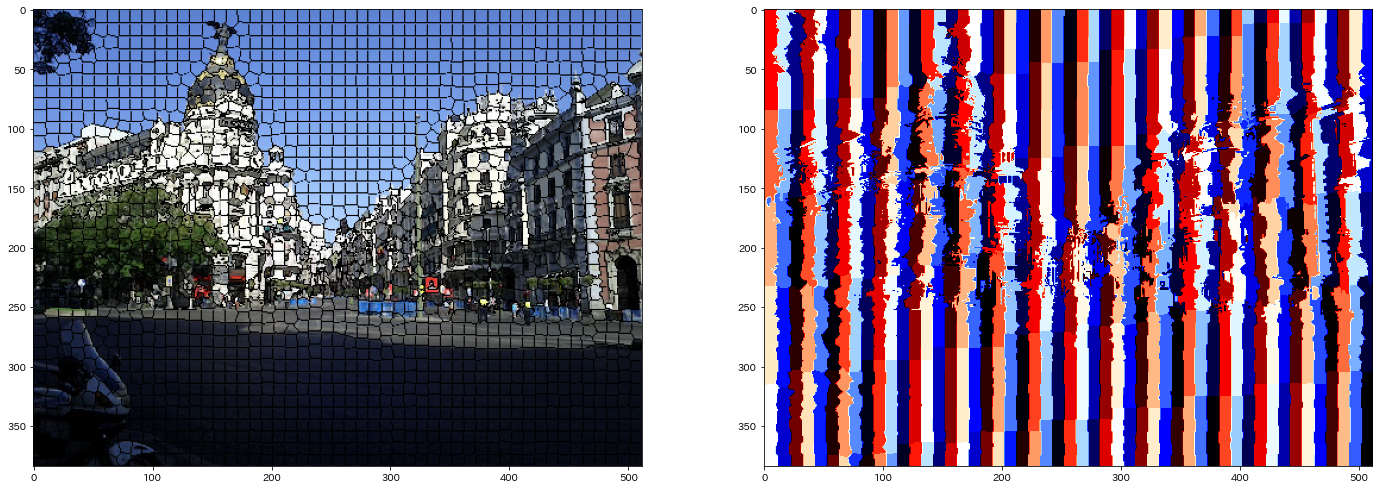

In [15]:
lsc = cv2.ximgproc.createSuperpixelLSC(cimg, region_size=10, ratio=0.2)
lsc.iterate(10)
mask = lsc.getLabelContourMask()
label = lsc.getLabels()
number = lsc.getNumberOfSuperpixels()
inv_mask = cv2.bitwise_not(mask)
dst = cv2.bitwise_and(cimg, cimg, mask = inv_mask)
print(f'Number of Superpixels: {number}')
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(label, cmap='flag')